# Import Libraries


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load Dataset

In [69]:
df = pd.read_csv('Unemployment in India.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


# Preview Data


In [70]:
print("Dataset Head:\n", df.head())
print("\nInfo:\n", df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nDrop Duplicates:\n", df.drop_duplicates())


Dataset Head:
            Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 t

# Rename Columns


In [71]:
df.columns = ['State', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)','Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Region']

# Convert Date to Datetime Format


In [72]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-72-b9c6864122be>:1: UserWarning:

Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



# Unemployment Trend Over Time


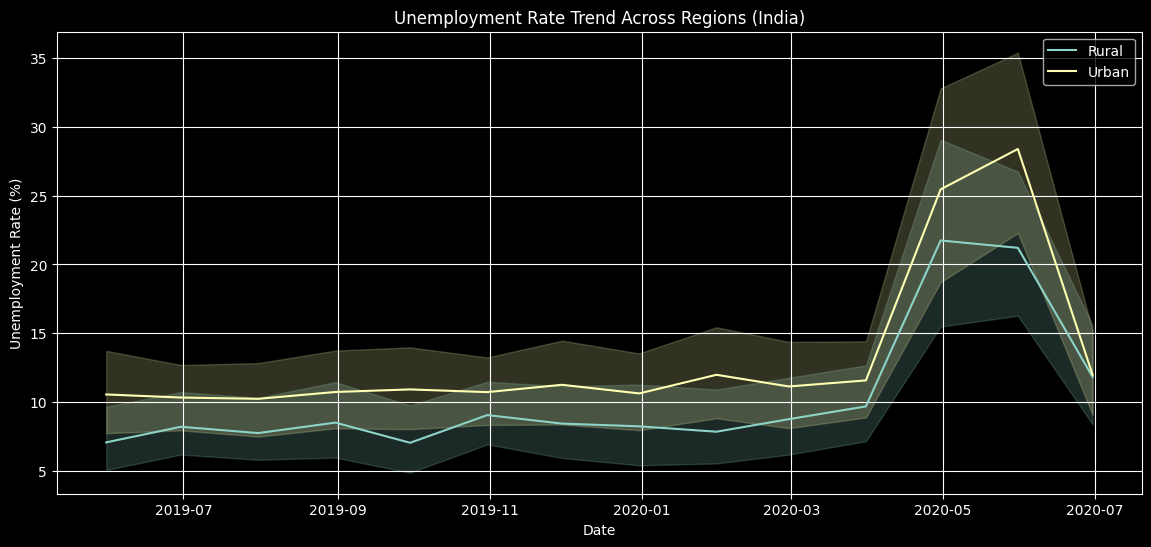

In [73]:
plt.style.use('dark_background')
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df, hue='Region')
plt.title('Unemployment Rate Trend Across Regions (India)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Heatmap of Unemployment by State


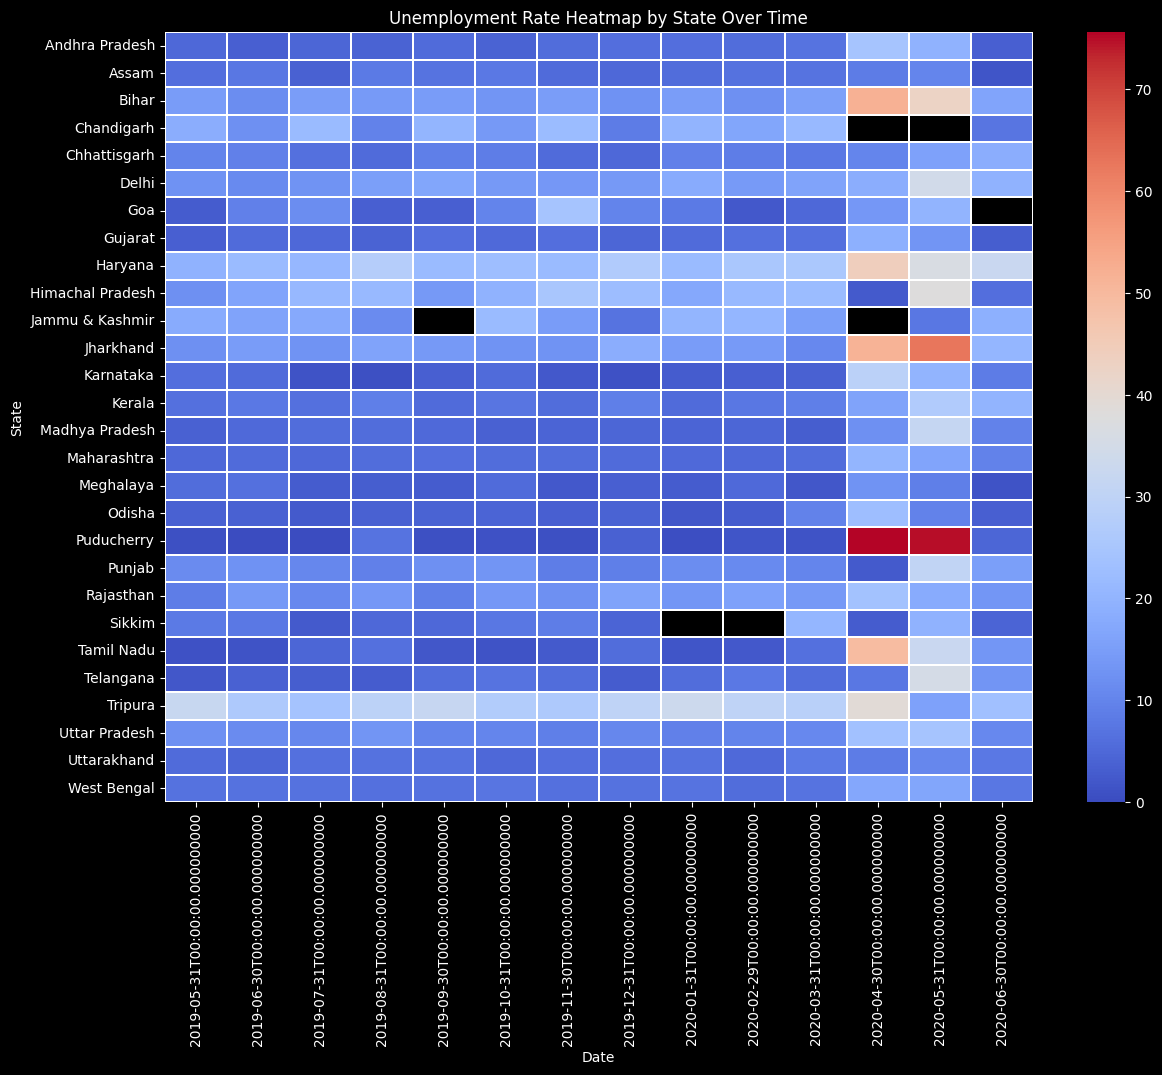

In [74]:
plt.style.use('dark_background')
pivot = df.pivot_table(values='Estimated Unemployment Rate (%)',
                       index='State', columns='Date')
plt.figure(figsize=(14, 10))
sns.heatmap(pivot, cmap='coolwarm', linecolor='white', linewidths=0.1)
plt.title('Unemployment Rate Heatmap by State Over Time')
plt.template=('plotly_dark')
plt.show()

# Distribution of Unemployment Rate

In [75]:
fig = px.histogram(df, x='Estimated Unemployment Rate (%)',
                    nbins=20, title='Distribution of Unemployment Rate',
                    template='plotly_dark')
fig.show()

# Average Unemployment Rate by Region


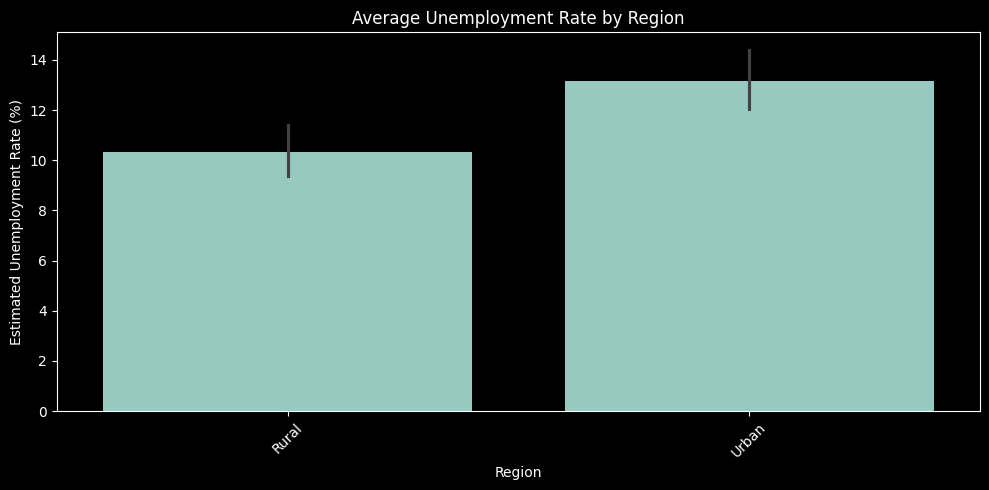

In [76]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data=df)
plt.title('Average Unemployment Rate by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Labour Participation Rate by Region

In [77]:
plt = px.box(df, x='Region', y='Estimated Labour Participation Rate (%)',
             title='Labour Participation Rate by Region',
             template='plotly_dark')
plt.show()

# Area-wise Unemployment Rate Comparison

In [78]:
fig = px.bar(df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index(),
             x='Region', y='Estimated Unemployment Rate (%)',
             title='Average Unemployment Rate by Area', template='plotly_dark')
fig.show()

# Top Regions with Highest Unemployment¶


In [79]:
top_regions = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()
top_regions = top_regions.sort_values(by='Estimated Unemployment Rate (%)', ascending=False).head(10)
fig = px.bar(top_regions, x='Region', y='Estimated Unemployment Rate (%)',
             title='Top 10 Regions with Highest Unemployment Rate', template='plotly_dark')
fig.show()

# Employment Trend in Rural vs Urban Areas

In [80]:
fig = px.area(df, x='Date', y='Estimated Employed', color='Region',
              title='Employment Trend in Rural vs Urban Areas', template='plotly_dark')
fig.show()

# Unemployment vs Employment for Different Areas¶


In [81]:
fig = px.scatter(df, x='Estimated Unemployment Rate (%)', y='Estimated Employed', color='Region',
                 title='Unemployment vs Employment for Rural and Urban Areas', template='plotly_dark')
fig.show()

# Time-based Trends for Unemployment Rate in Top Regions


In [82]:
top_regions = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()
top_regions = top_regions.sort_values(by='Estimated Unemployment Rate (%)', ascending=False).head(5)
top_regions_data = df[df['Region'].isin(top_regions['Region'])]
fig = px.line(top_regions_data, x='Date', y='Estimated Unemployment Rate (%)', color='Region',
              title='Time-based Trends for Unemployment Rate in Top Regions', template='plotly_dark')
fig.show()